## Import dependencies

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'ham10000-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3513799%2F6128847%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240331%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240331T070258Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2fea36de5c12603fb56fd82bd4c1c2759018b6c82f5f571226524a9bee2649a4bcea700bc2ff26987d295493afb50d8a899fa2876d250490dfe9d23f859b7083d2b2ea9c29f96e7a9cd32cc2a4f454b3b4bceccf2ef6d8117cad43fb03761ae677e0453578004b8a8aa0288e748c9c81f1078e467942278c91dab7d46e30f8051035b9244f193f630974662f4452f5288f9aadce4242a789d75939deaef7ebdf4a515e9efb54320c907f38ebcf8b6b20258d1c2b7bef783bbdd87f69c14ff049cd1e75c1a7f0ca34080e389ca6fddaed635f27370580223dd33527a219b79ddc3b13e1e1823096b6b159e96e6720720c87816b55be3aa691d612c47d17d44148'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3061298459 bytes downloaded
Downloaded and uncompressed: ham10000-data
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/ham10000-data/HAM10000_DATA/train_dir/vasc/ISIC_0033123.jpg
/kaggle/input/ham10000-data/HAM10000_DATA/train_dir/vasc/_20_780114.jpg
/kaggle/input/ham10000-data/HAM10000_DATA/train_dir/vasc/_94_3773973.jpg
/kaggle/input/ham10000-data/HAM10000_DATA/train_dir/vasc/_31_7865013.jpg
/kaggle/input/ham10000-data/HAM10000_DATA/train_dir/vasc/_99_6146423.jpg
/kaggle/input/ham10000-data/HAM10000_DATA/train_dir/vasc/_40_2518115.jpg
/kaggle/input/ham10000-data/HAM10000_DATA/train_dir/vasc/_30_3012548.jpg
/kaggle/input/ham10000-data/HAM10000_DATA/train_dir/vasc/_73_928137.jpg
/kaggle/input/ham10000-data/HAM10000_DATA/train_dir/vasc/_110_802053.jpg
/kaggle/input/ham10000-data/HAM10000_DATA/train_dir/vasc/_95_9488369.jpg
/kaggle/input/ham10000-data/HAM10000_DATA/train_dir/vasc/_68_9795062.jpg
/kaggle/input/ham10000-data/HAM10000_DATA/train_dir/vasc/_99_21095.jpg
/kaggle/input/ham10000-data/HAM10000_DATA/train_dir/vasc/_80_1169316.jpg
/ka

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
import numpy as np
from scipy.fftpack import dct
import numpy as np
import tensorflow.keras as K
import tensorflow.keras.backend as Kback

## Dataloader

In [4]:
train_datagen = K.preprocessing.image.ImageDataGenerator(rescale = 1./255, validation_split = 0.3)

train_dataset  = train_datagen.flow_from_directory(directory = '/kaggle/input/ham10000-data/HAM10000_DATA/train_dir',
                                                   target_size = (256,256),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   shuffle=True,
                                                   batch_size = 64)
validation_dataset  = train_datagen.flow_from_directory(directory = '/kaggle/input/ham10000-data/HAM10000_DATA/train_dir',
                                                   target_size = (256,256),
                                                   class_mode = 'categorical',
                                                   subset = 'validation',
                                                   shuffle=True,
                                                   batch_size = 64)


test_datagen = K.preprocessing.image.ImageDataGenerator(rescale = 1./255)

test_dataset  = test_datagen.flow_from_directory(directory = '/kaggle/input/ham10000-data/HAM10000_DATA/test_dir',
                                                   target_size = (256,256),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   shuffle=False,
                                                   batch_size = 64)

Found 36411 images belonging to 7 classes.
Found 15601 images belonging to 7 classes.
Found 1103 images belonging to 7 classes.


In [5]:
print(train_dataset.class_indices)
print(validation_dataset.class_indices)
print(test_dataset.class_indices)

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}
{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


## Metrics

In [6]:
def f1_score(y_true, y_pred):
    true_positives = Kback.sum(Kback.round(Kback.clip(y_true * y_pred, 0, 1)))
    possible_positives = Kback.sum(Kback.round(Kback.clip(y_true, 0, 1)))
    predicted_positives = Kback.sum(Kback.round(Kback.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + Kback.epsilon())
    recall = true_positives / (possible_positives + Kback.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+Kback.epsilon())
    return f1_val

METRICS = [
      "accuracy",
      K.metrics.Precision(name='precision'),
      K.metrics.Recall(name='recall'),
      K.metrics.AUC(name='auc'),
      f1_score
]

## Model

#### Deep Learner

In [7]:
input_layer = K.Input(shape=(256,256,3))
deep_learner = K.applications.Xception(include_top = False, weights = "imagenet", input_tensor = input_layer)
for layer in deep_learner.layers:
    layer.trainable = True
# for i, layer in enumerate(deep_learner.layers):
#     print(i, layer.name, "-", layer.trainable)

83683744/83683744 [==============================] - 3s 0us/step


#### Model

In [8]:
input_img = K.layers.Input(shape=(256,256,3))
feat_img = deep_learner(input_img)
flat = K.layers.GlobalAveragePooling2D()(feat_img)
output = K.layers.Dense(7, activation='softmax')(flat)

model = K.Model(inputs=input_img, outputs=output)
optimizer = K.optimizers.Adam(lr=0.01)
model.compile(loss=["categorical_crossentropy"], metrics=METRICS, optimizer = optimizer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 7)                 14343     
                                                                 
Total params: 20875823 (79.63 MB)
Trainable params: 20821295 (79.43 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
model.load_weights('/content/drive/MyDrive/model.h5')

## Training

In [11]:
model_checkpoint_callback = K.callbacks.ModelCheckpoint(
    filepath='/content/drive/MyDrive/model.h5',
    monitor='val_f1_score',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
    )

history = model.fit(train_dataset,
                    epochs = 35,
                    validation_data = validation_dataset,
                    verbose = 1,
                    callbacks=[model_checkpoint_callback],
                    shuffle = True)

Epoch 1/35
569/569 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9892 - precision: 0.9899 - recall: 0.9887 - auc: 0.9994 - f1_score: 0.9893
Epoch 1: val_f1_score improved from -inf to 0.58937, saving model to /content/drive/MyDrive/model.h5
569/569 [==============================] - 812s 1s/step - loss: 0.0332 - accuracy: 0.9892 - precision: 0.9899 - recall: 0.9887 - auc: 0.9994 - f1_score: 0.9893 - val_loss: 11.9306 - val_accuracy: 0.5893 - val_precision: 0.5946 - val_recall: 0.5843 - val_auc: 0.8113 - val_f1_score: 0.5894
Epoch 2/35
569/569 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9919 - precision: 0.9925 - recall: 0.9916 - auc: 0.9996 - f1_score: 0.9921
Epoch 2: val_f1_score improved from 0.58937 to 0.64925, saving model to /content/drive/MyDrive/model.h5
569/569 [==============================] - 750s 1s/step - loss: 0.0245 - accuracy: 0.9919 - precision: 0.9925 - recall: 0.9916 - auc: 0.9996 - f1_score: 0.9921 - val_loss: 9.

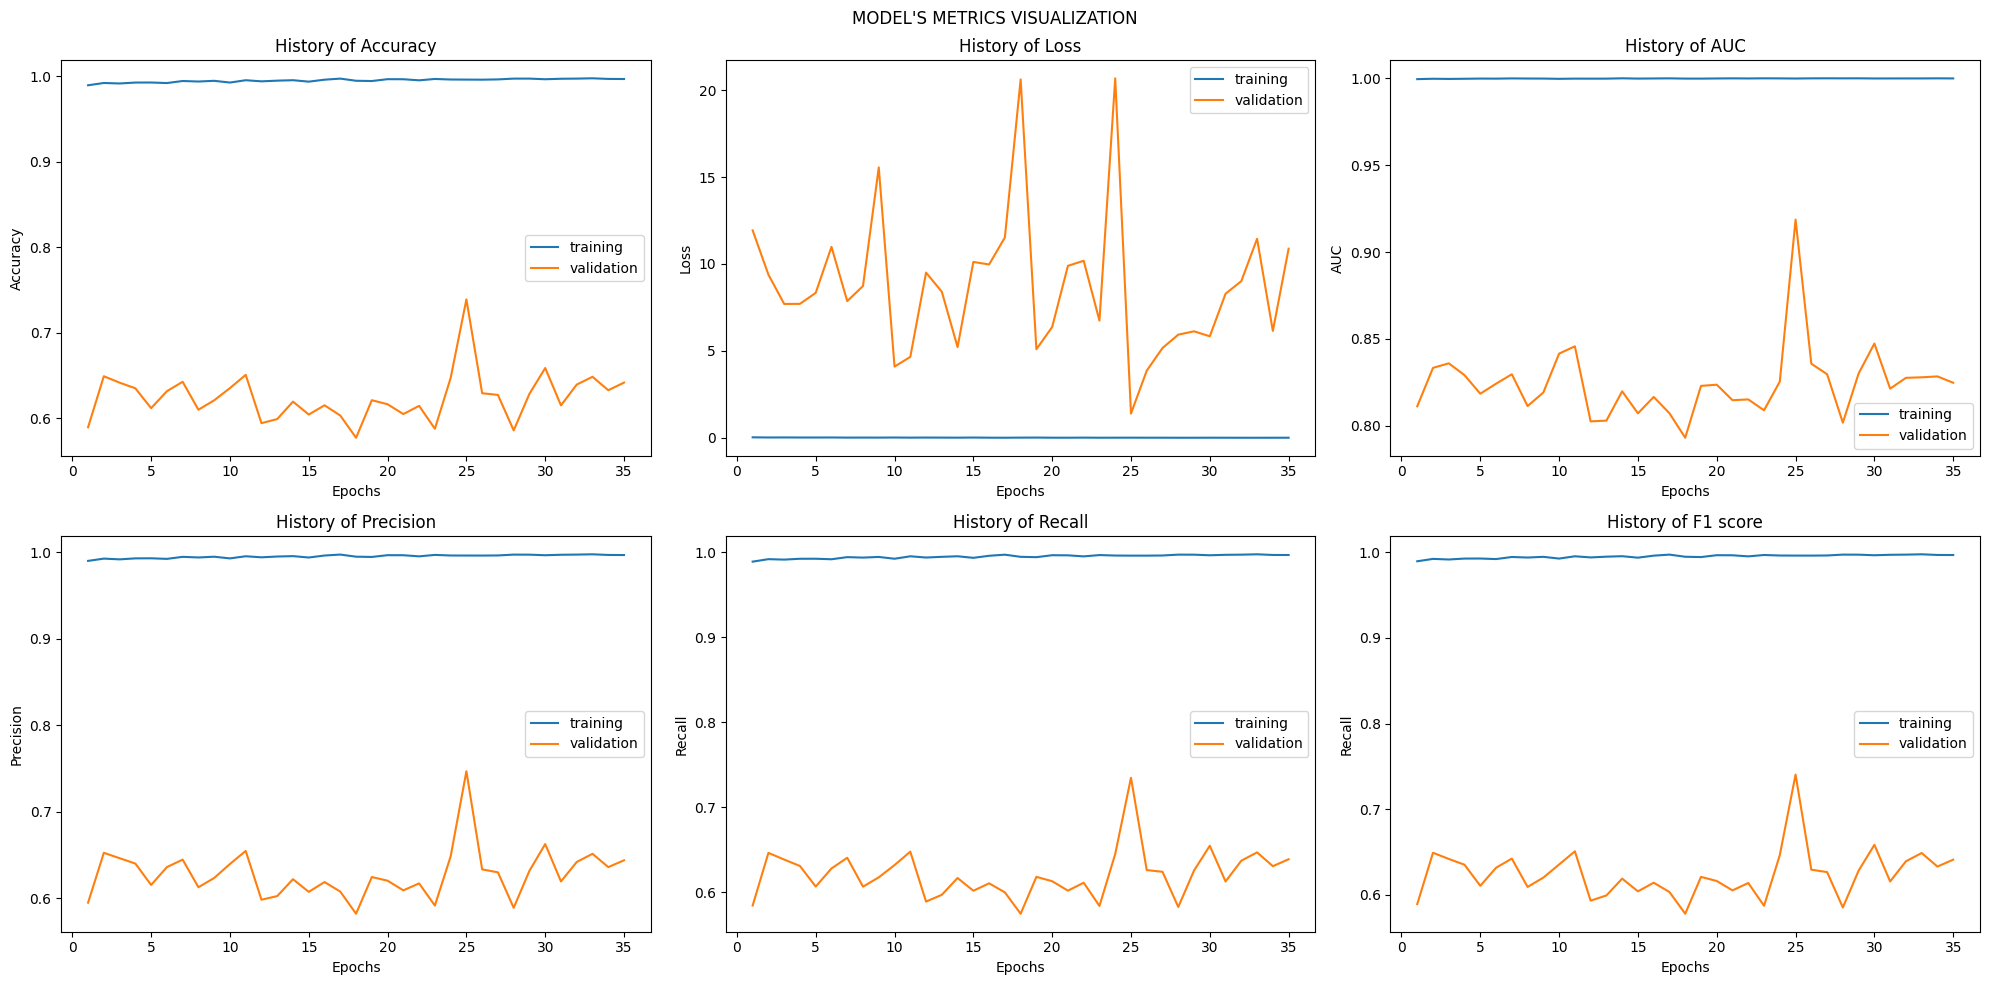

In [12]:
import matplotlib.pyplot as plt

def Train_Val_Plot(acc, val_acc, loss, val_loss, auc, val_auc, precision, val_precision, recall, val_recall, f1_score, val_f1_score):
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))
    fig.suptitle("MODEL'S METRICS VISUALIZATION")

    axes[0, 0].plot(range(1, len(acc) + 1), acc)
    axes[0, 0].plot(range(1, len(val_acc) + 1), val_acc)
    axes[0, 0].set_title('History of Accuracy')
    axes[0, 0].set_xlabel('Epochs')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend(['training', 'validation'])

    axes[0, 1].plot(range(1, len(loss) + 1), loss)
    axes[0, 1].plot(range(1, len(val_loss) + 1), val_loss)
    axes[0, 1].set_title('History of Loss')
    axes[0, 1].set_xlabel('Epochs')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend(['training', 'validation'])

    axes[0, 2].plot(range(1, len(auc) + 1), auc)
    axes[0, 2].plot(range(1, len(val_auc) + 1), val_auc)
    axes[0, 2].set_title('History of AUC')
    axes[0, 2].set_xlabel('Epochs')
    axes[0, 2].set_ylabel('AUC')
    axes[0, 2].legend(['training', 'validation'])

    axes[1, 0].plot(range(1, len(precision) + 1), precision)
    axes[1, 0].plot(range(1, len(val_precision) + 1), val_precision)
    axes[1, 0].set_title('History of Precision')
    axes[1, 0].set_xlabel('Epochs')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].legend(['training', 'validation'])

    axes[1, 1].plot(range(1, len(recall) + 1), recall)
    axes[1, 1].plot(range(1, len(val_recall) + 1), val_recall)
    axes[1, 1].set_title('History of Recall')
    axes[1, 1].set_xlabel('Epochs')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].legend(['training', 'validation'])

    axes[1, 2].plot(range(1, len(f1_score) + 1), f1_score)
    axes[1, 2].plot(range(1, len(val_f1_score) + 1), val_f1_score)
    axes[1, 2].set_title('History of F1 score')
    axes[1, 2].set_xlabel('Epochs')
    axes[1, 2].set_ylabel('Recall')  # Corrected from 'Recall' to 'F1 score'
    axes[1, 2].legend(['training', 'validation'])

    plt.tight_layout()
    plt.show()

# Call the function with your history data
Train_Val_Plot(history.history['accuracy'], history.history['val_accuracy'],
               history.history['loss'], history.history['val_loss'],
               history.history['auc'], history.history['val_auc'],
               history.history['precision'], history.history['val_precision'],
               history.history['recall'], history.history['val_recall'],
               history.history['f1_score'], history.history['val_f1_score'])

## Testing

In [13]:
model.load_weights("/content/drive/MyDrive/model.h5")

# Evaluate the model
loss, accuracy, precision, recall, auc, f1_score = model.evaluate(test_dataset)
print("Accuracy", accuracy)
print("Loss", loss)
print("Precision", precision)
print("Recall", recall)
print("AUC", auc)
print("F1-score", f1_score)

18/18 [==============================] - 11s 601ms/step - loss: 0.7295 - accuracy: 0.8849 - precision: 0.8879 - recall: 0.8830 - auc: 0.9667 - f1_score: 0.8722
Accuracy 0.8848595023155212
Loss 0.729526937007904
Precision 0.887876033782959
Recall 0.8830462098121643
AUC 0.9666888117790222
F1-score 0.8721660375595093


<ipython-input-14-bb83ab515527>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test_dataset, 1157)


Confusion Matrix


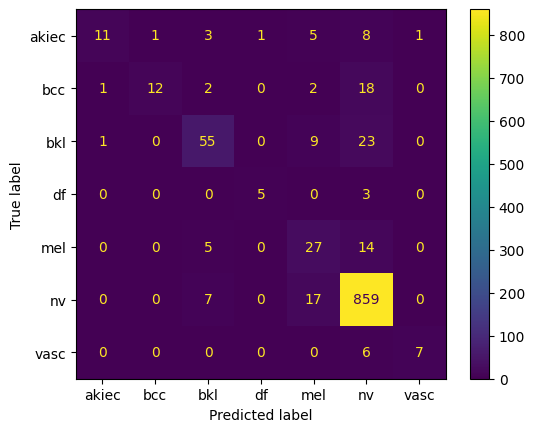

Classification Report
              precision    recall  f1-score   support

       akiec       0.85      0.37      0.51        30
         bcc       0.92      0.34      0.50        35
         bkl       0.76      0.62      0.69        88
          df       0.83      0.62      0.71         8
         mel       0.45      0.59      0.51        46
          nv       0.92      0.97      0.95       883
        vasc       0.88      0.54      0.67        13

    accuracy                           0.88      1103
   macro avg       0.80      0.58      0.65      1103
weighted avg       0.89      0.88      0.88      1103



In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
Y_pred = model.predict_generator(test_dataset, 1157)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
disp = ConfusionMatrixDisplay(confusion_matrix(test_dataset.classes, y_pred),display_labels=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
disp.plot()
plt.show()
print('Classification Report')
target_names = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
print(classification_report(test_dataset.classes, y_pred, target_names=target_names))

In [15]:
modeller = K.Model(inputs=model.input, outputs=model.get_layer(name="global_average_pooling2d").output)
# Define the number of classes
num_classes = 7

# Initialize empty arrays for features and labels
all_features = []
all_labels = []

max_iterations = 1103
i=0

# Extract features and labels from the Keras test generator
for batch_features, batch_labels in test_dataset:
    features = modeller.predict(batch_features)
    all_features.append(features)
    all_labels.append(batch_labels)
    i+=1
    if i >= max_iterations - 1:
        break

2/2 [==============================] - 0s 140ms/step


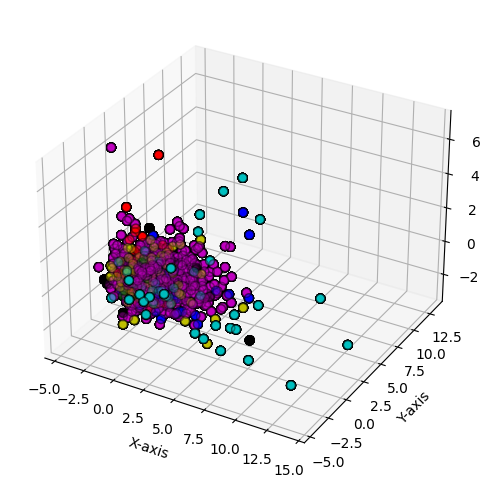

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
j_range = range(1102)  # Adjust the range as needed

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Define colors for different classes
colors = ['b', 'r', 'y', 'g', 'c', 'm', 'k']

# Set the size and alpha for the points
point_size = 40
point_alpha = 0.3

for j in j_range:
    # Check if the number of samples or features is less than 3
#     if all_features[j].shape[0] < 3 or all_features[j].shape[1] < 3:
#         continue

    # Apply PCA to reduce the dimension to 3
    pca = PCA(n_components=3)

    features_pca_0 = pca.fit_transform(all_features[j])

    # Get the labels for this 'j'
    labels = all_labels[j]

    # Plot each class with circular markers and different colors
    for i in range(num_classes):
        class_indices = np.where(labels[:, i] == 1)[0]
        current_color = colors[i % len(colors)]  # Get the color for this class
        ax.scatter(features_pca_0[class_indices, 0], features_pca_0[class_indices, 1], features_pca_0[class_indices, 2], c=current_color, marker='o', s=point_size, alpha=point_alpha, ec='black')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()